In [1]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Balanced accuracies Gemma 7b acc:0.6259038752976834, Llama3 acc: 0.5745886555531501, mistral acc: 0.6519592985494695, phi 3 med acc: 0.5935970989391643, baseline acc: 0.5


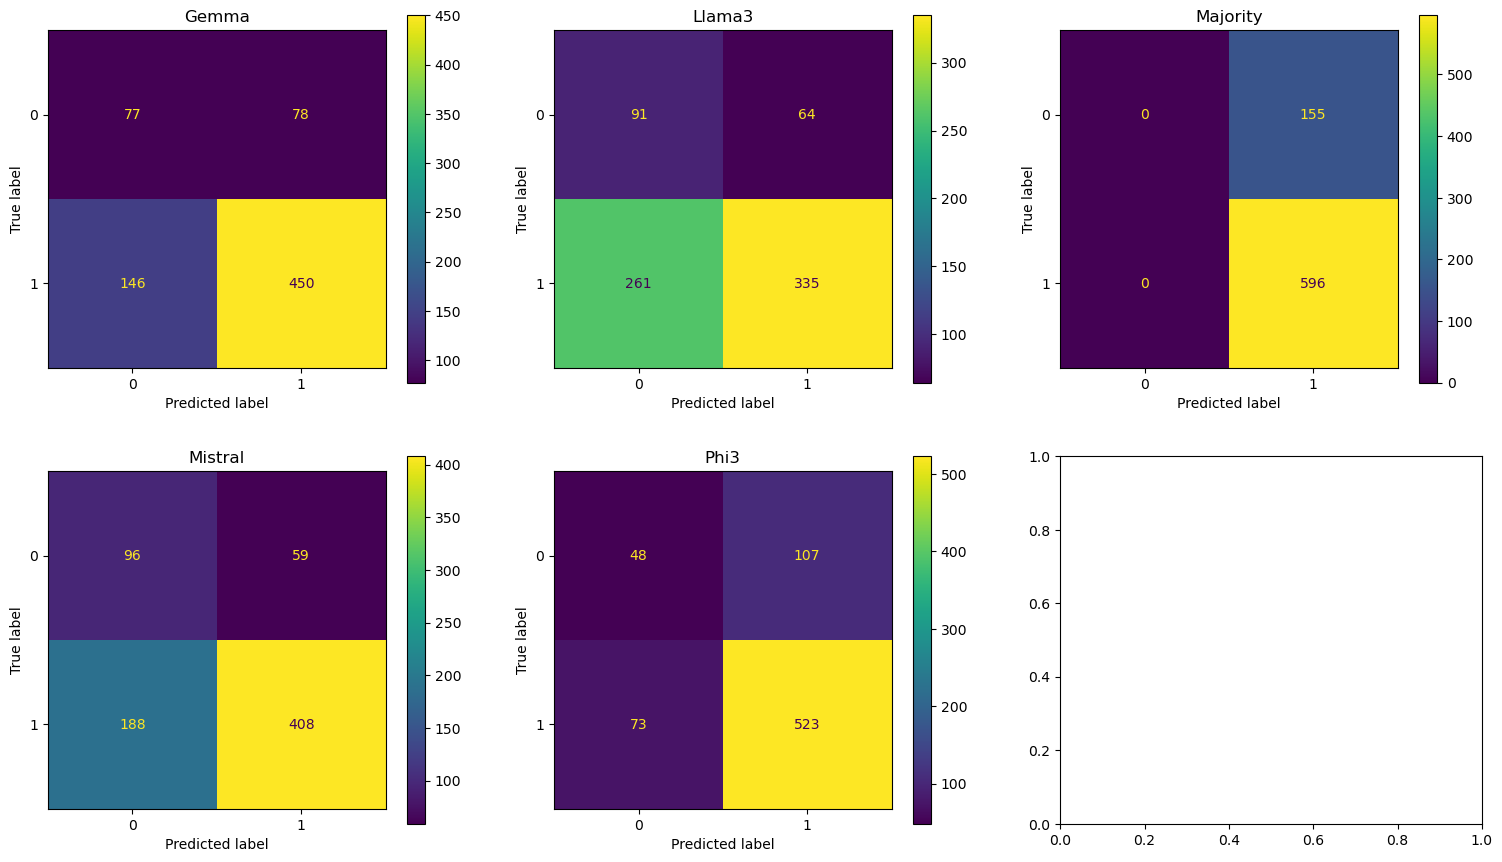

In [14]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
baseline = [1]*len(df_child_guess["is_valid"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma 7b acc:{}, Llama3 acc: {}, mistral acc: {}, phi 3 med acc: {}, baseline acc: {}".format(balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"]),balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"]), balanced_accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"]), balanced_accuracy_score(df_child_guess["is_valid"], baseline)))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["gemma:7b"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["llama3"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('Llama3')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["mistral"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral')

cm = confusion_matrix(df_child_guess["is_valid"], df_child_guess["phi3:medium"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('Phi3')

cm = confusion_matrix(df_child_guess["is_valid"], baseline)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('Majority')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



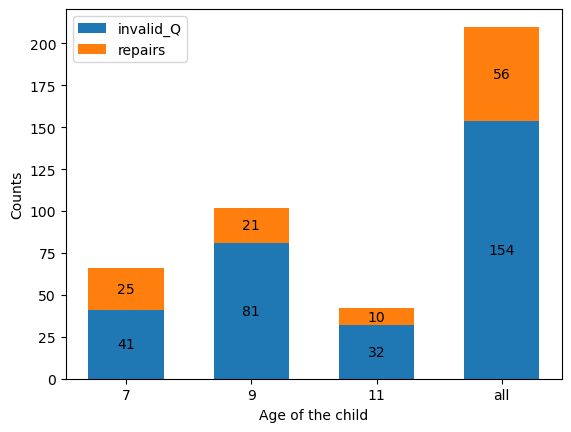

In [48]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
df_child_guess = df_child_guess[df_child_guess["agreement"] == 0]
temp_df = df_child_guess.groupby(["child_age", "initiate_repair"]).size().reset_index()
#print(temp_df)
temp_df = temp_df.rename(columns={0: "values"})
#print(len(df_child_guess))

ages = ["7", "9", "11", "all"]

counts = {"invalid_Q": [], "repairs":[]}

for age in sorted(temp_df["child_age"].unique()):
    counts["invalid_Q"].append(temp_df[temp_df["child_age"] == age]["values"].sum())
    counts["repairs"].append(temp_df.loc[(temp_df['child_age'] == age) & (temp_df['initiate_repair'] == 1), 'values'].values[0])

counts["invalid_Q"].append(temp_df["values"].sum())
counts["repairs"].append(temp_df[temp_df["initiate_repair"] == 1]["values"].sum())

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(4)

for item, item_count in counts.items():
    p = ax.bar(ages, item_count, width, label=item, bottom=bottom)
    bottom += item_count

    ax.bar_label(p, label_type='center')

#ax.set_title('Number of penguins by sex')
ax.set_xlabel('Age of the child')
ax.set_ylabel('Counts')
ax.legend()

plt.show()

/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["error_type"] = df["error_type"].apply(lambda x: x.split(","))
/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["error_type"] = df["error_type"].apply(lambda x: [item.strip() for item in x])
/var/folders/5h/4gmv4knx5t97bwcdqvv685gc0000gn/T/ipykernel_241/1595693502.py:16: SettingWithCopyWarning: 
A va

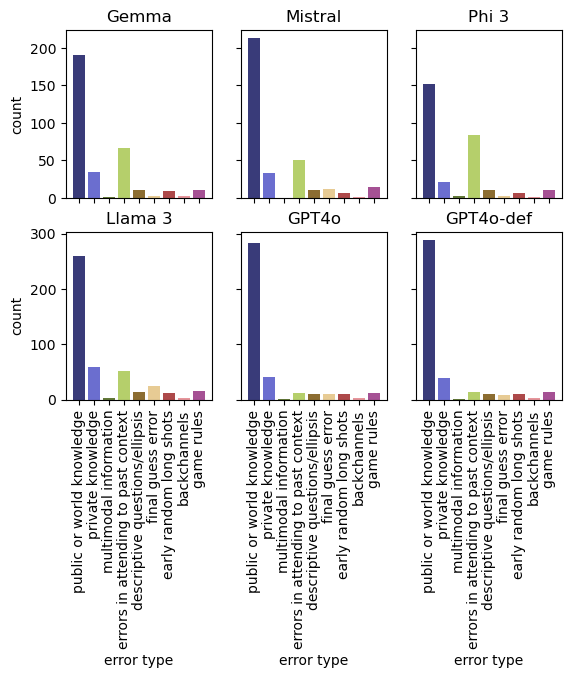

In [53]:
error_dict = {
    '1': "public or world knowledge",
    '2': "private knowledge",
    '3': "multimodal information",
    '4': "errors in attending to past context",
    '5': "descriptive questions/ellipsis",
    '6': "final guess error",
    '7': "early random long shots",
    '8': "backchannels",
    '9': "game rules"
}

model_list = ["gemma:7b", "mistral", "llama3", "phi3:medium", "gpt4o", "gpt4o:def"]

def get_counts(df):
    df["error_type"] = df["error_type"].apply(lambda x: x.split(","))
    df["error_type"] = df["error_type"].apply(lambda x: [item.strip() for item in x])
    
    # Get the count of each individual number
    number_counts = df['error_type'].explode().value_counts()
    #print(number_counts)
    y = []

    for error in list(error_dict.keys()):
        if error in number_counts.index:
            y.append(number_counts[error])
        else:
            y.append(0)
    return y
        

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f, delimiter=';') for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]


df_child_guess = df_child_guess[~df_child_guess["is_valid"].isna()]
#print(len(df_child_guess))
    

fig, axs = plt.subplots(2,3, sharey='row')

#plt.figure(figsize=(20,6))


num_colors = len(error_dict)
x1 = list(error_dict.keys())
labels = list(error_dict.values())
x= np.arange(num_colors)
cm = plt.get_cmap('tab20b')
colors = [cm(1.*i/num_colors) for i in range(num_colors)]

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gemma:7b"]]
y1 = get_counts(temp_df)
#print(f"x:{x1}, y:{y1}, label:{labels}, color:{colors}")
axs[0,0].bar(x1, y1, label=labels, color=colors)
axs[0, 0].set_title('Gemma')
#axs[0,0].legend(title='error labels', loc='upper right')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["mistral"]]
y2 = get_counts(temp_df)
axs[0,1].bar(x1, y2, label=labels, color=colors)
axs[0, 1].set_title('Mistral')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["llama3"]]
y3 = get_counts(temp_df)
axs[1,0].bar(x1, y3, label=labels, color=colors)
axs[1, 0].set_title('Llama 3')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["phi3:medium"]]
y4 = get_counts(temp_df)
axs[0,2].bar(x1, y4, label=labels, color=colors)
axs[0, 2].set_title('Phi 3')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gpt4o"]]
y5 = get_counts(temp_df)
axs[1,1].bar(x1, y5, label=labels, color=colors)
axs[1, 1].set_title('GPT4o')

temp_df = df_child_guess[df_child_guess["is_valid"] != df_child_guess["gpt4o:def"]]
y6 = get_counts(temp_df)
axs[1,2].bar(x1, y6, label=labels, color=colors)
axs[1, 2].set_title('GPT4o-def')


for ax in fig.get_axes():
    ax.set(xlabel='error type', ylabel='count')
    ax.label_outer()
    ax.set_xticks(x)
    ax.set_xticklabels(list(error_dict.values()), rotation=90)


plt.show()


267
error_type
[1]          195
[2]           31
[1, 7]        12
[1, 4]        12
[1, 5]         4
[1, 5, 9]      3
[1, 9]         2
[1, 8]         2
[2, 4]         1
[2, 5]         1
[2, 4, 5]      1
[1, 6]         1
[1, 3]         1
[1, 3, 4]      1
Name: count, dtype: int64


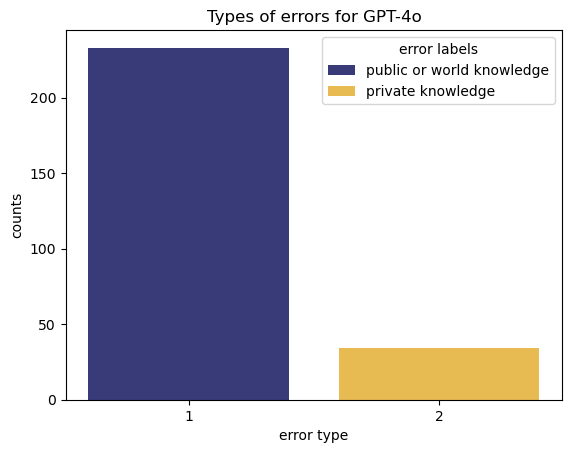

In [3]:
error_dict = {
    '1': "public or world knowledge",
    '2': "private knowledge",
    '3': "multimodal information",
    '4': "errors in attending to past context",
    '5': "descriptive questions/ellipsis",
    '6': "final guess error",
    '7': "early random long shots",
    '8': "backchannels",
    '9': "game rules"
}


csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]


df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
#print(len(df_child_guess))
df_child_guess = df_child_guess[df_child_guess["agreement"] != df_child_guess["gpt4o:def-replaced"]]
df_child_guess["error_type"] = df_child_guess["error_type"].apply(lambda x: x.split(","))
df_child_guess["error_type"] = df_child_guess["error_type"].apply(lambda x: [item.strip() for item in x])

print(len(df_child_guess))
print(df_child_guess["error_type"].value_counts())


# Get the count of each individual number
number_counts = df_child_guess['error_type'].explode().value_counts().sort_index()
labels, x, y = [], [], []

for item, count in number_counts.items():
    x.append(item)
    y.append(count)
    labels.append(error_dict[item])

x, y, labels = x[:2], y[:2], labels[:2]

#print(number_counts)

fig, ax = plt.subplots()

num_colors = len(x)
cm = plt.get_cmap('tab20b')

#fig = plt.figure()
colors = [cm(1.*i/num_colors) for i in range(num_colors)]

ax.bar(x, y, label=labels, color=colors)

ax.set_ylabel('counts')
ax.set_xlabel('error type')
ax.set_title('Types of errors for GPT-4o')
ax.legend(title='error labels')
fig.savefig("data/results/dual_error_analysis_gpt4o_def_replaced.png")

plt.show()


739
59
Balanced accuracies Gemma2 acc:0.7351190476190477, mistral acc: 0.7529761904761905, mistral-nemo acc: 0.7797619047619048, llama3.1 acc: 0.4107142857142857, baseline acc: 0.5, phi3:medium acc: 0.7053571428571428, gpt4o-def acc: 0.8154761904761905
accuracies Gemma2 acc:0.7966101694915254, mistral acc: 0.8305084745762712, mistral-nemo acc: 0.8813559322033898, llama3.1 acc: 0.7796610169491526, baseline acc: 0.05084745762711865, phi3:medium acc: 0.4406779661016949, gpt4o-def acc: 0.9491525423728814


/Users/abhishekagrawal/miniforge3/envs/common_ground/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/abhishekagrawal/miniforge3/envs/common_ground/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/abhishekagrawal/miniforge3/envs/common_ground/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


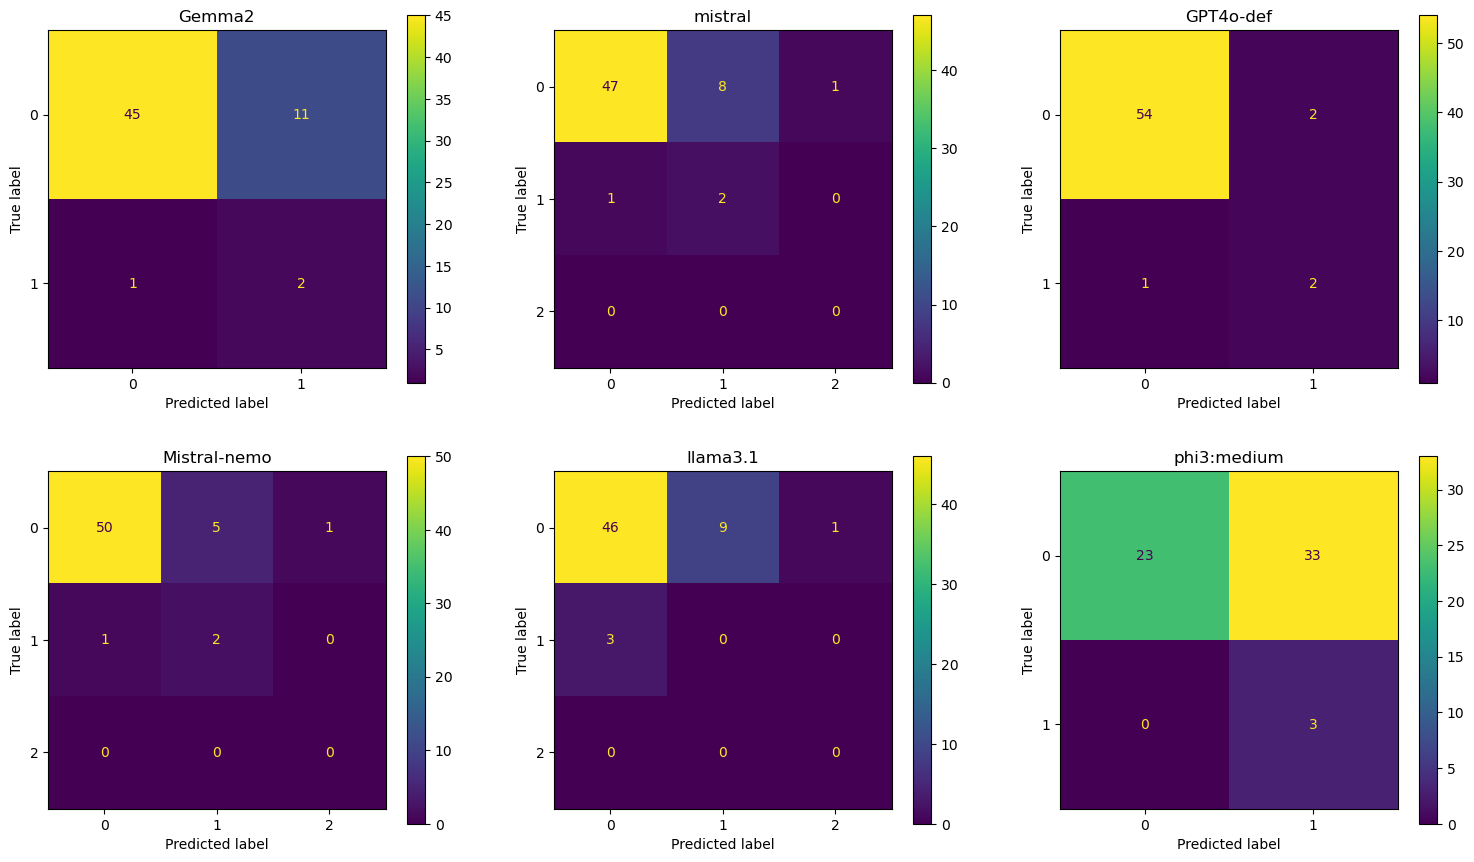

In [38]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
print(len(df_child_guess))
df_child_guess = df_child_guess[df_child_guess["initiate_repair"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
print(len(df_child_guess))
baseline = [1]*len(df_child_guess["agreement"])
#print(f"Gemma 7b acc:{accuracy_score(df_child_guess["is_valid"], df_child_guess["gemma:7b"])}, Llama3 acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["llama3"])}, mistral acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["mistral"])}, phi 3 med acc: {accuracy_score(df_child_guess["is_valid"], df_child_guess["phi3:medium"])},")
print("Balanced accuracies Gemma2 acc:{}, mistral acc: {}, mistral-nemo acc: {}, llama3.1 acc: {}, baseline acc: {}, phi3:medium acc: {}, gpt4o-def acc: {}".format(balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["gemma2-replaced"]),balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["mistral-replaced"]), balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["mistral-nemo-replaced"]), balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["llama3.1-replaced"]), balanced_accuracy_score(df_child_guess["agreement"], baseline), balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["phi3:medium-replaced"]), balanced_accuracy_score(df_child_guess["agreement"], df_child_guess["gpt4o:def-replaced"])))
print("accuracies Gemma2 acc:{}, mistral acc: {}, mistral-nemo acc: {}, llama3.1 acc: {}, baseline acc: {}, phi3:medium acc: {}, gpt4o-def acc: {}".format(accuracy_score(df_child_guess["agreement"], df_child_guess["gemma2-replaced"]),accuracy_score(df_child_guess["agreement"], df_child_guess["mistral-replaced"]), accuracy_score(df_child_guess["agreement"], df_child_guess["mistral-nemo-replaced"]), accuracy_score(df_child_guess["agreement"], df_child_guess["llama3.1-replaced"]), accuracy_score(df_child_guess["agreement"], baseline), accuracy_score(df_child_guess["agreement"], df_child_guess["phi3:medium-replaced"]), accuracy_score(df_child_guess["agreement"], df_child_guess["gpt4o:def-replaced"])))

fig, axs = plt.subplots(2,3)

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["gemma2-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,0])
axs[0, 0].set_title('Gemma2')

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["mistral-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,1])
axs[0, 1].set_title('mistral')

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["mistral-nemo-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,0])
axs[1, 0].set_title('Mistral-nemo')

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["llama3.1-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,1])
axs[1, 1].set_title('llama3.1')

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["gpt4o:def-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[0,2])
axs[0, 2].set_title('GPT4o-def')

cm = confusion_matrix(df_child_guess["agreement"], df_child_guess["phi3:medium-replaced"])
ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=axs[1,2])
axs[1, 2].set_title('phi3:medium')
fig.set_size_inches(18.5, 10.5)
#plt.figure(figsize=(20, 6), dpi=80)

plt.show()

#print(df_concat["file_id"].unique())
#df_2 = df_concat[df_concat["file_id"] == "ID_2"]

#df_concat = df_concat[df_concat["is_valid"] == 0]
#df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())

#print(len(df_concat))


#df_parent_guess = df_concat[df_concat["guesser_type"]=="parent"]
#print(df_parent_guess["file_id"].unique())
#print(df_child_guess, df_parent_guess)

#df_parent_guess.groupby(["child_age", "file_id"])["is_valid"].count()



In [54]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
#print(len(df_child_guess))
df_child_repair = df_child_guess[df_child_guess["initiate_repair"] == 1]
print(len(df_child_repair))
#print("Balanced accuracy:{}".format(balanced_accuracy_score(df_child_repair["is_valid"], df_child_repair["mistral-fewshot"])))
#print("accuracy: {}".format(accuracy_score(df_child_repair["is_valid"], df_child_repair["mistral-fewshot"])))

df_child_non_repair_valid = df_child_guess[(df_child_guess["initiate_repair"] == 0) & (df_child_guess["agreement"] == 1)]
df_child_non_repair_invalid = df_child_guess[(df_child_guess["initiate_repair"] == 0) & (df_child_guess["agreement"] == 0)]
df_child_non_repair_valid = df_child_non_repair_valid.sample(n=56)
df_child_non_repair_invalid = df_child_non_repair_invalid.sample(n=3)
df = pd.concat([df_child_repair, df_child_non_repair_valid, df_child_non_repair_invalid], ignore_index=True)
print("Equal sampling of repair/non-repair scores:")
print(f"Gemma 2 acc:{accuracy_score(df['agreement'], df['gemma2-replaced'])}, Llama3.1 acc: {accuracy_score(df['agreement'], df['llama3.1-replaced'])}, Llama3.2 acc: {accuracy_score(df['agreement'], df['llama3.2-replaced'])}, gpt4o:def acc: {accuracy_score(df['agreement'], df['gpt4o:def-replaced'])}, mistral acc: {accuracy_score(df['agreement'], df['mistral-replaced'])}, mistral-nemo acc: {accuracy_score(df['agreement'], df['mistral-nemo-replaced'])}, phi 3 med acc: {accuracy_score(df['agreement'], df['phi3:medium-replaced'])}")
#print("Balanced accuracies Gemma 2 acc:{}, mistral-nemo acc: {}, mistral acc: {}, llama3.1 acc: {}, llama3.2 acc: {}, gpt4o:def acc: {}, phi3:medium acc: {}".format(balanced_accuracy_score(df["agreement"], df["gemma2-replaced"]),balanced_accuracy_score(df["agreement"], df["mistral-nemo-replaced"]), balanced_accuracy_score(df["agreement"], df["mistral-replaced"]), balanced_accuracy_score(df["agreement"], df["llama3.1-replaced"]), balanced_accuracy_score(df["agreement"], df["llama3.2-replaced"]), balanced_accuracy_score(df["agreement"], df["gpt4o:def-replaced"]), balanced_accuracy_score(df["agreement"], df["phi3:medium-replaced"])))
#print("Balanced accuracy:{}".format(balanced_accuracy_score(df["is_valid"], df["mistral-fewshot"])))
#print("accuracy: {}".format(accuracy_score(df["is_valid"], df["mistral-fewshot"])))
#df_child_repair["is_valid"].value_counts()
#print(len(df_child_guess))
#df_child_guess

59
Equal sampling of repair/non-repair scores:
Gemma 2 acc:0.6694915254237288, Llama3.1 acc: 0.6016949152542372, Llama3.2 acc: 0.5508474576271186, gpt4o:def acc: 0.7542372881355932, mistral acc: 0.6271186440677966, mistral-nemo acc: 0.559322033898305, phi 3 med acc: 0.635593220338983


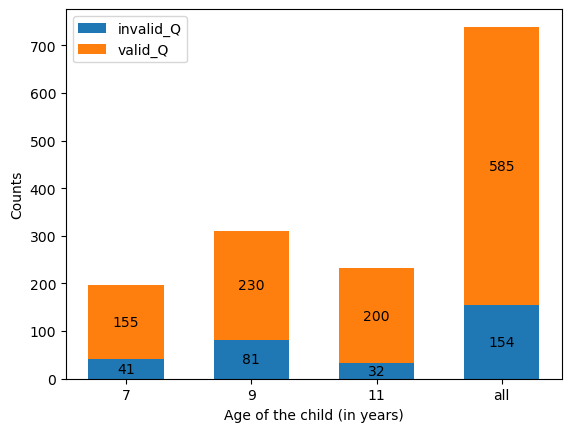

In [6]:
import pandas as pd
from glob import glob
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
temp_df = df_child_guess.groupby(["child_age", "agreement"]).size().reset_index()
#print(temp_df)
temp_df = temp_df.rename(columns={0: "values"})
#print(len(df_child_guess))

ages = ["7", "9", "11", "all"]

counts = {"invalid_Q": [], "valid_Q":[]}

for age in sorted(temp_df["child_age"].unique()):
    counts["invalid_Q"].append(temp_df.loc[(temp_df['child_age'] == age) & (temp_df['agreement'] == 0), 'values'].values[0])
    counts["valid_Q"].append(temp_df.loc[(temp_df['child_age'] == age) & (temp_df['agreement'] == 1), 'values'].values[0])

counts["invalid_Q"].append(temp_df[temp_df["agreement"] == 0]["values"].sum())
counts["valid_Q"].append(temp_df[temp_df["agreement"] == 1]["values"].sum())

width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(4)

for item, item_count in counts.items():
    p = ax.bar(ages, item_count, width, label=item, bottom=bottom)
    bottom += item_count

    ax.bar_label(p, label_type='center')

ax.set_xlabel('Age of the child (in years)')
ax.set_ylabel('Counts')
ax.legend()
plt.savefig("data/results/valid_invalid_distribution.png", dpi=300)
plt.show()


In [4]:
csv_files = glob("data/prompts/*.csv")
df_concat = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)
df_concat = df_concat[~df_concat["guesser_type"].isna()]
#print(df_concat["guesser_type"].unique())

df_concat["guesser_type"] = df_concat["guesser_type"].apply(lambda x: x.strip())
df_child_guess = df_concat[df_concat["guesser_type"]=="child"]

#result = df_child_guess[df_child_guess['is_valid'].notnull() & df_child_guess['llama3'].isnull()]
#print(result)

df_child_guess = df_child_guess[~df_child_guess["agreement"].isna()]
#df_child_guess = df_child_guess[df_child_guess["is_valid"] == 1]
#df_child_guess.groupby(["child_age"])["is_valid"].count()
#print(len(df_child_guess))
print(f"Abhishek acc:{balanced_accuracy_score(df_child_guess['agreement'], df_child_guess['is_valid'])}")

df1 = pd.read_csv("data/prompts/abdellah/agreement.csv", delimiter=';')
df2 = pd.read_csv("data/prompts/abdellah/agreement_round_2.csv", delimiter=';')

df1 = df1[['agreement', 'initiate_repair', 'abhi_anno', 'abd_anno']]
df2 = df2[['agreement', 'initiate_repair', 'abhi_anno', 'abd_anno']]
df_concat = pd.concat([df1,df2], ignore_index=True)

df_concat = df_concat[~df_concat["agreement"].isna()]
print("Accuracies for the two rounds of agreement")
print(f"Abhishek acc:{balanced_accuracy_score(df_concat['agreement'], df_concat['abhi_anno'])}, Abdellah acc:{balanced_accuracy_score(df_concat['agreement'], df_concat['abd_anno'])}, Human score: {balanced_accuracy_score(df_concat['abd_anno'], df_concat['abhi_anno'])}")

Abhishek acc:0.9082306582306583
Accuracies for the two rounds of agreement
Abhishek acc:0.9354906299238996, Abdellah acc:0.882203560293674, Human score: 0.839840395075866
